# Graph Structure

In [160]:
# imports
import networkx as nx
import random # for testing

In [161]:
# preliminary data structs for data management
stocks = ["APPL","AMZN","CHL","CSCO","FB","GOOG","INTC","MSFT","ORCL","T","TSM","VZ"]
print("number of stocks", len(stocks))
directions = {"positive": 1, "negative": -1, "neutral":0}

number of stocks 12


In [162]:
# init graph
init_graph = nx.Graph()
init_nodes = []
for stock in stocks:
  rand_dir = random.choice(["positive","negative","neutral"]) # placeholder data
  rand_sent = random.choice(["positive","negative","neutral"]) # placeholder data
  init_nodes.append((stock,{"stock_direction":directions[rand_dir], "sentiment":directions[rand_sent]}))
init_graph.add_nodes_from(init_nodes)
for i in stocks:
  for j in stocks:
    if j != i and j > i:
      init_graph.add_edge(i,j)

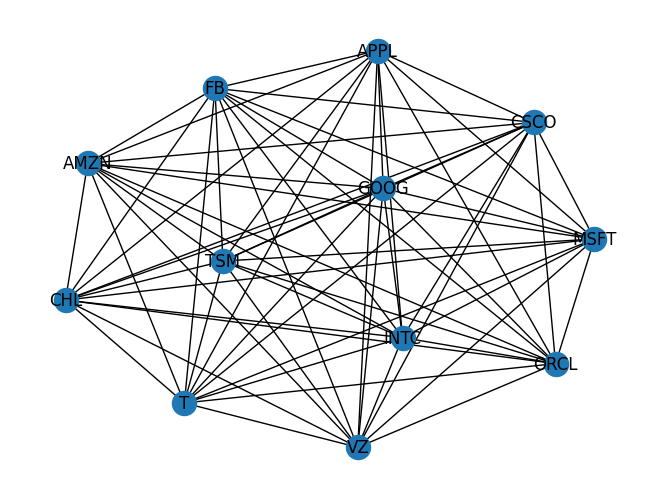

In [163]:
# visualizing nodes and edges of init graph
nx.draw(init_graph, with_labels=True)

In [164]:
print("init graph number of nodes",init_graph.number_of_nodes())
print("init graph number of edges",init_graph.number_of_edges())

init graph number of nodes 12
init graph number of edges 66


## Training GNN?

In [165]:
def new_graph(new_nodes):
  """
  new_nodes: node attribute information at time t
  new_nodes =
  {
    "APPL": {stock_direction: [enter stock direction here], sentiment: [enter sentiment here]},
    "AMZN": {stock_direction: [enter stock direction here], sentiment: [enter sentiment here]},
    "CHL": {stock_direction: [enter stock direction here], sentiment: [enter sentiment here]},
    "CSCO": {stock_direction: [enter stock direction here], sentiment: [enter sentiment here]},
    "FB": {stock_direction: [enter stock direction here], sentiment: [enter sentiment here]},
    "GOOG": {stock_direction: [enter stock direction here], sentiment: [enter sentiment here]},
    "INTC": {stock_direction: [enter stock direction here], sentiment: [enter sentiment here]},
    "MSFT": {stock_direction: [enter stock direction here], sentiment: [enter sentiment here]},
    "ORCL": {stock_direction: [enter stock direction here], sentiment: [enter sentiment here]},
    "T": {stock_direction: [enter stock direction here], sentiment: [enter sentiment here]},
    "TSM": {stock_direction: [enter stock direction here], sentiment: [enter sentiment here]},
    "VZ": {stock_direction: [enter stock direction here], sentiment: [enter sentiment here]}
  }
  """
  G = nx.Graph()
  nodes = []
  for stock in stocks:
    rand_dir = random.choice(["positive","negative","neutral"]) # placeholder data
    rand_sent = random.choice(["positive","negative","neutral"]) # placeholder data
    nodes.append((stock,{"stock_direction":directions[rand_dir], "sentiment":directions[rand_sent]}))
  G.add_nodes_from(nodes)
  for i in stocks:
    for j in stocks:
      if j != i and j > i:
        G.add_edge(i,j)
  return G

In [166]:
# training loop
sentiment_graphs = [init_graph] # len of sentiment_graphs will increase as training instances increase
i = 0
num_days_in_dataset = 5 # TODO update utilizing dataset information
while i < num_days_in_dataset:
  example_node_updates = {}
  for stock in stocks:
    rand_dir = random.choice(["positive","negative","neutral"]) # placeholder data
    rand_sent = random.choice(["positive","negative","neutral"]) # placeholder data
    example_node_updates[stock] =  {"stock_direction": directions[rand_dir], "sentiment":directions[rand_sent]}
  if i == 0: print(example_node_updates)  # print check
  sentiment_graphs.append(new_graph(example_node_updates))
  i += 1

{'APPL': {'stock_direction': -1, 'sentiment': 1}, 'AMZN': {'stock_direction': -1, 'sentiment': -1}, 'CHL': {'stock_direction': 0, 'sentiment': 1}, 'CSCO': {'stock_direction': 1, 'sentiment': 0}, 'FB': {'stock_direction': -1, 'sentiment': 1}, 'GOOG': {'stock_direction': -1, 'sentiment': 1}, 'INTC': {'stock_direction': 0, 'sentiment': -1}, 'MSFT': {'stock_direction': -1, 'sentiment': -1}, 'ORCL': {'stock_direction': 0, 'sentiment': -1}, 'T': {'stock_direction': -1, 'sentiment': 1}, 'TSM': {'stock_direction': 1, 'sentiment': 1}, 'VZ': {'stock_direction': 1, 'sentiment': 1}}


In [167]:
print("sentiment graph count",len(sentiment_graphs))
for i,graph in enumerate(sentiment_graphs):
  print("t=" + str(i),graph.nodes(data=True))

sentiment graph count 6
t=0 [('APPL', {'stock_direction': 1, 'sentiment': 1}), ('AMZN', {'stock_direction': 0, 'sentiment': 0}), ('CHL', {'stock_direction': -1, 'sentiment': -1}), ('CSCO', {'stock_direction': 1, 'sentiment': 0}), ('FB', {'stock_direction': 0, 'sentiment': -1}), ('GOOG', {'stock_direction': -1, 'sentiment': 0}), ('INTC', {'stock_direction': 1, 'sentiment': -1}), ('MSFT', {'stock_direction': -1, 'sentiment': 1}), ('ORCL', {'stock_direction': -1, 'sentiment': -1}), ('T', {'stock_direction': 1, 'sentiment': -1}), ('TSM', {'stock_direction': 0, 'sentiment': -1}), ('VZ', {'stock_direction': 0, 'sentiment': -1})]
t=1 [('APPL', {'stock_direction': -1, 'sentiment': -1}), ('AMZN', {'stock_direction': -1, 'sentiment': 1}), ('CHL', {'stock_direction': 1, 'sentiment': 1}), ('CSCO', {'stock_direction': 1, 'sentiment': 1}), ('FB', {'stock_direction': -1, 'sentiment': -1}), ('GOOG', {'stock_direction': -1, 'sentiment': 0}), ('INTC', {'stock_direction': 0, 'sentiment': -1}), ('MSFT', {